In [1]:
!python -m pip install tensorflow
!python -m pip install tf-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 586.1 kB/s eta 0:00:00m eta 0:00:010:00:15
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 KB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 2.1 MB/s eta 0:00:002.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 2.4 MB/s eta 0:00:002.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import tensorflow as tf
tf.random.set_seed(22)

2024-02-07 14:42:12.885460: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 14:42:12.889092: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 14:42:12.933083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 14:42:17.529816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:
import json
import numpy as np
import pandas as pd
from time import time
import random
import matplotlib.pyplot as plt

In [4]:
name_model = "mlp_rnd_walk_many_dist-mini_publaynet_50"
with open(f"./dataset/json/{name_model}.json", "r") as f:
    dataset = json.load(f)

In [5]:
print("Первый x:\n", dataset["x"][0])
print("Последний, x:\n", dataset["x"][-1])
print("Размер x:\t", len(dataset["x"][0]))
print("Первый y:\t", dataset["y"][0])
print("Последний y:\t", dataset["y"][0])
print("Кол-во записей:\t", len(dataset["x"]))

Первый x:
 [0.0010090817356205853, 0.0, 0.0030272452068617556, 0.0010090817356205853, 0.0030272452068617556, 0.0, 0.0, 0.0030272452068617556, 0.0030272452068617556, 0.0, 0.0, 0.0030272452068617556, 0.0020181634712411706, 0.0030272452068617556, 0.005045408678102927, 0.0030272452068617556, 0.0030272452068617556, 0.0, 0.0, 0.0030272452068617556, 0.0010090817356205853, 0.0, 0.0030272452068617556, 0.0010090817356205853, 0.0030272452068617556, 0.0, 0.0, 0.0030272452068617556, 0.0030272452068617556, 0.0, 0.0, 0.0030272452068617556, 0.0010090817356205853, 0.0, 0.0030272452068617556, 0.0010090817356205853, 0.0030272452068617556, 0.0, 0.0, 0.0030272452068617556, 0.0020181634712411706, 0.0030272452068617556, 0.005045408678102927, 0.0030272452068617556, 0.005045408678102927, 0.020181634712411706, 0.0, 0.028254288597376387, 0.0020181634712411706, 0.0030272452068617556, 0.005045408678102927, 0.0030272452068617556, 0.0020181634712411706, 0.0030272452068617556, 0.005045408678102927, 0.0030272452068617

In [159]:
X = np.array(dataset["x"])
y = np.array(dataset["y"])


In [160]:
len(y), len(X)

(4997, 4997)

In [164]:
keys = np.unique(y)
Y_keys = dict()
for i, key in enumerate(keys):
    zeros = np.zeros((len(keys)))
    zeros[i] = 1
    Y_keys[key] = zeros
Y_keys
Y = np.array([Y_keys[yi] for yi in y])
Y_keys, Y

({1: array([1., 0., 0., 0., 0.]),
  2: array([0., 1., 0., 0., 0.]),
  3: array([0., 0., 1., 0., 0.]),
  4: array([0., 0., 0., 1., 0.]),
  5: array([0., 0., 0., 0., 1.])},
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]]))

In [165]:
X_clus_list = []
Y_clus_list = []
for i, item in enumerate(Y_keys.keys()):
    X_clus_list.append(X[Y[:,i]==1,:])
    Y_clus_list.append(Y[Y[:,i]==1,:])

In [166]:
balans_len = [len(yc) for yc in Y_clus_list]
min_len = min(balans_len)
min_len, balans_len

(998, [1000, 1000, 1000, 999, 998])

In [167]:
X = np.concatenate([xc[:min_len] for xc in X_clus_list])
Y = np.concatenate([yc[:min_len] for yc in Y_clus_list])

In [168]:
X.dtype = "float32"
Y.dtype = "float32"
data = [(tf.reshape(x, shape=[-1, 100]),y ) for x, y in zip(X, Y)]

random.shuffle(data)
len_data = len(data)
len_test = round(len_data*0.2)
len_val = round((len_data-len_test)*0.2)
len_train = len_data-len_test-len_val
print(len_data, ":", len_train, len_val, len_test)

train_data, val_data = data[:len_train], data[len_train:len_train+len_val]

4990 : 3194 798 998


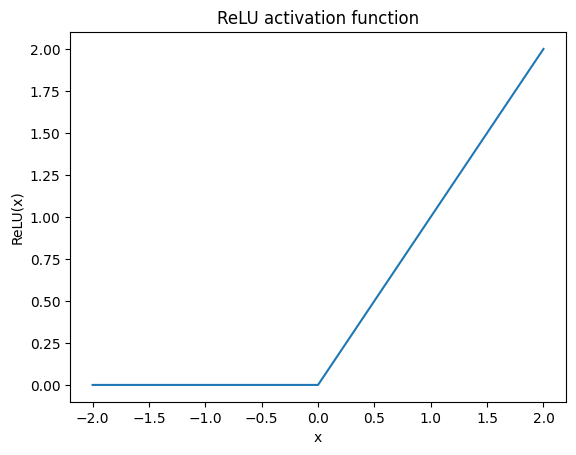

In [169]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.relu(x));
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function');

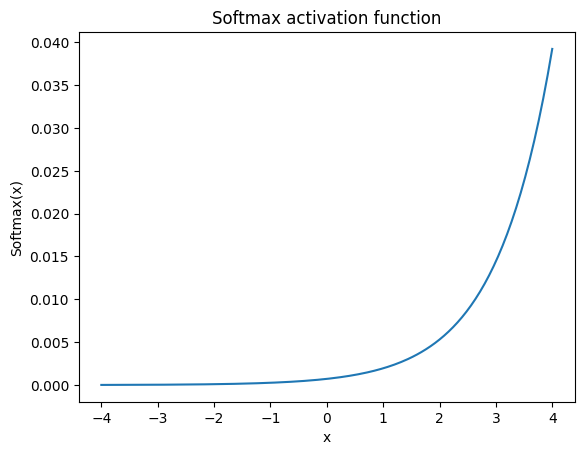

In [170]:
x = tf.linspace(-4, 4, 201)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.softmax(x, axis=0));
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.title('Softmax activation function');

In [171]:
def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

In [149]:
class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]                                                  
      # Initialize the weights and biases
      self.w = tf.Variable(self.weight_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

In [150]:
class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  @tf.function
  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return x

In [151]:
hidden_layer_1_size = 50
hidden_layer_2_size = 100
hidden_layer_3_size = 100
hidden_layer_4_size = 50
output_size = 5

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_3_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_4_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

In [172]:
def cross_entropy_loss(y_pred, y):
  # Compute cross entropy loss with a sparse operation
  
  sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=, logits=y_pred)
  return tf.reduce_mean(sparse_ce)

In [173]:
def accuracy(y_pred, y):
  # Compute accuracy after extracting class predictions
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)
  is_equal = tf.equal(y, class_preds)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

In [174]:
class Adam:

    def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, ep=1e-7):
      # Initialize optimizer parameters and variable slots
      self.beta_1 = beta_1
      self.beta_2 = beta_2
      self.learning_rate = learning_rate
      self.ep = ep
      self.t = 1.
      self.v_dvar, self.s_dvar = [], []
      self.built = False

    def apply_gradients(self, grads, vars):
      # Initialize variables on the first call
      if not self.built:
        for var in vars:
          v = tf.Variable(tf.zeros(shape=var.shape))
          s = tf.Variable(tf.zeros(shape=var.shape))
          self.v_dvar.append(v)
          self.s_dvar.append(s)
        self.built = True
      # Update the model variables given their gradients
      for i, (d_var, var) in enumerate(zip(grads, vars)):
        self.v_dvar[i].assign(self.beta_1*self.v_dvar[i] + (1-self.beta_1)*d_var)
        self.s_dvar[i].assign(self.beta_2*self.s_dvar[i] + (1-self.beta_2)*tf.square(d_var))
        v_dvar_bc = self.v_dvar[i]/(1-(self.beta_1**self.t))
        s_dvar_bc = self.s_dvar[i]/(1-(self.beta_2**self.t))
        var.assign_sub(self.learning_rate*(v_dvar_bc/(tf.sqrt(s_dvar_bc) + self.ep)))
      self.t += 1.
      return

In [175]:
def train_step(x_batch, y_batch, loss, acc, model, optimizer):
  # Update the model state given a batch of data
  with tf.GradientTape() as tape:
    y_pred = model(x_batch)
    batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  grads = tape.gradient(batch_loss, model.variables)
  optimizer.apply_gradients(grads, model.variables)
  return batch_loss, batch_acc

def val_step(x_batch, y_batch, loss, acc, model):
  # Evaluate the model on given a batch of validation data
  y_pred = model(x_batch)
  batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  return batch_loss, batch_acc

In [176]:
def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
  # Initialize data structures
  train_losses, train_accs = [], []
  val_losses, val_accs = [], []

  # Format training loop and begin training
  for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_val, batch_accs_val = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_data:
      # Compute gradients and update the model's parameters
      batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
      # Keep track of batch-level training performance
      batch_losses_train.append(batch_loss)
      batch_accs_train.append(batch_acc)

    # Iterate over the validation data
    for x_batch, y_batch in val_data:
      batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
      batch_losses_val.append(batch_loss)
      batch_accs_val.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    val_loss, val_acc = tf.reduce_mean(batch_losses_val), tf.reduce_mean(batch_accs_val)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch: {epoch}")
    print(f"Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")
    print(f"Validation loss: {val_loss:.3f}, Validation accuracy: {val_acc:.3f}")
    return train_losses, train_accs, val_losses, val_accs

In [177]:
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, train_data, val_data, 
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=10)

ValueError: `labels.shape.rank` must equal `logits.shape.rank - 1`. Received: labels.shape=() of rank 0 and logits.shape=(4, 5) of rank 2

In [85]:
train_data[0][0].shape[1]

100

In [158]:
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'tensorflow_datasets'